In [1]:
import numpy as np  # noqa
import matplotlib.pyplot as plt  # noqa

Exercise 4.9
Problem with ph: 0.25
Sweeps needed: 16
Problem with ph: 0.4
Sweeps needed: 19
Problem with ph: 0.55
Sweeps needed: 1838


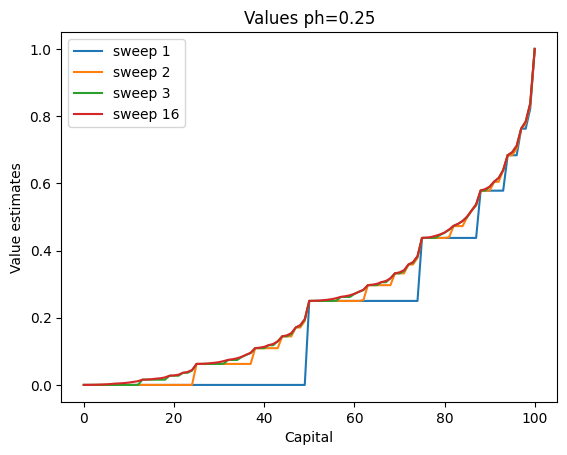

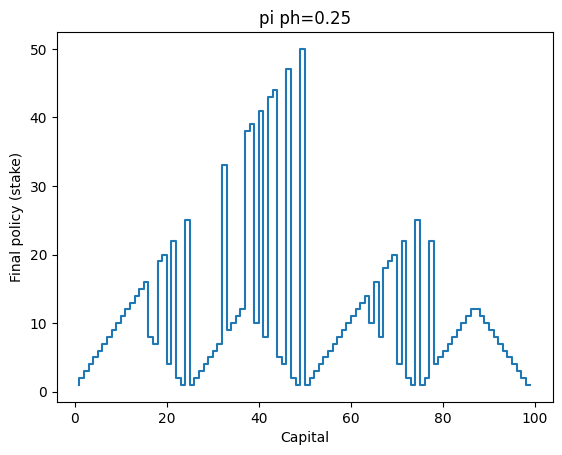

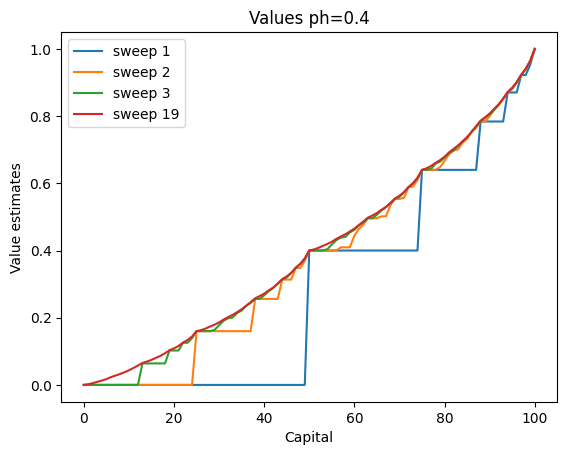

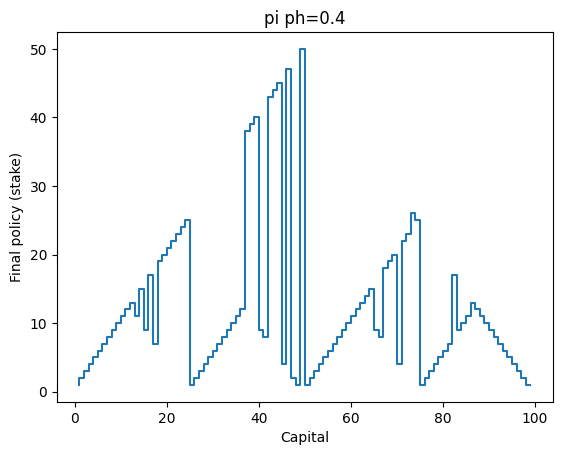

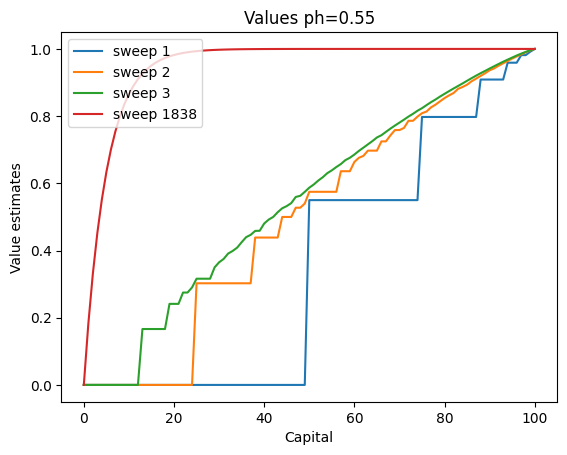

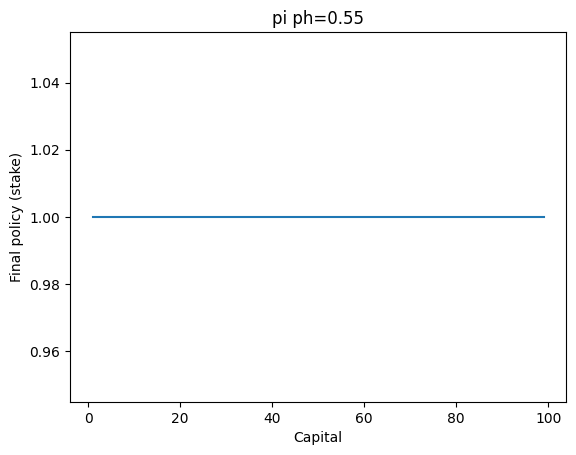

In [5]:
# GAMBLER PROBLEM
#
# EXERCISE 4.9
#
# Implement value iteration for the gambler's problem and solve it for ph = 0.25 and ph = 0.55. In programming, you may
# find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them
# values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as theta→0?


# A wrapper class for parameters of the algorithm
class Params:
    def __init__(self):
        # Money goal to reach
        self.max_money = 100

        # Possible values of probability of the coin coming up heads (winning the bet)
        self.p_hs = [0.25, 0.4, 0.55]
        # self.p_hs = [0.4]

        # Small number determining the accuracy of policy evaluation's estimation
        self.theta = 10**-10
        # self.theta = 10**-1000
        # self.theta = 0.00001

        # Discount
        self.gamma = 1


# A wrapper class for Value Iteration algorithm
class ValueIteration:
    def __init__(self, p_h, params):
        """
        :param p_h: probability of the coin coming up heads (winning the bet)
        :param params: the parameters instance
        """
        # Set up the ph value
        self.p_h = p_h

        # Set up parameters
        self.params = params

        # All possible states
        self.S = np.arange(1, self.params.max_money)

        # Value function
        self.V = np.zeros(self.params.max_money + 1)
        self.V[0] = 0
        self.V[self.params.max_money] = 1

        # List of value functions
        self.Vs = []

        # Policy function
        self.pi = None

        # Number of sweeps needed to complete the problem
        self.sweep_count = None

    def solve_problem(self):
        """
        Resolve Gambler Problem using Value Iteration
        """
        self.sweep_count = 0
        while True:
            delta = 0
            for s in self.S:
                v = self.V[s]
                self.V[s] = np.max([self.V_eval(s, a) for a in self.A(s)])
                delta = np.maximum(delta, abs(v - self.V[s]))
            if self.sweep_count < 3:
                self.Vs.append(self.V.copy())
            self.sweep_count += 1
            if delta < self.params.theta:
                break
        print("Sweeps needed:", self.sweep_count)
        self.Vs.append(self.V.copy())
        self.pi = [
            self.A(s)[np.argmax([self.V_eval(s, a) for a in self.A(s)])] for s in self.S
        ]

    def A(self, s):
        """
        Get all possible actions given a state
        :param s: state
        :return: possible actions
        """
        # All possible actions
        return np.arange(1, np.minimum(s, self.params.max_money - s) + 1)

    def V_eval(self, s, a):
        """
        Compute value given a state and an action for the state following the formula:
        sum over all s',r of p(s',r|s, a)[r + gamma*V(s')]
        :param s: state
        :param a: action
        :return: value
        """
        return self.params.gamma * self.V[
            s + a
        ] * self.p_h + self.params.gamma * self.V[s - a] * (1 - self.p_h)

    def print_Vs(self):
        """
        Print values for the first three sweeps and for the last one
        """
        plt.figure()
        plt.plot(self.Vs[0], label="sweep 1")
        plt.plot(self.Vs[1], label="sweep 2")
        plt.plot(self.Vs[2], label="sweep 3")
        plt.plot(self.Vs[3], label="sweep {}".format(self.sweep_count))
        plt.legend(loc="upper left")
        plt.xlabel("Capital")
        plt.ylabel("Value estimates")
        plt.title("Values ph={}".format(self.p_h))

    def print_pi(self):
        """
        Print policy
        """
        plt.figure()
        plt.step(self.S, self.pi)
        plt.xlabel("Capital")
        plt.ylabel("Final policy (stake)")
        plt.title("pi ph={}".format(self.p_h))


def exercise4_9():
    print("Exercise 4.9")

    # Set up parameters
    params = Params()

    for p_h in params.p_hs:
        print("Problem with ph:", p_h)

        # Set up the algorithm
        policy_iteration = ValueIteration(p_h, params)

        # Solve the problem
        policy_iteration.solve_problem()

        # Show results
        policy_iteration.print_Vs()
        policy_iteration.print_pi()


exercise4_9()
plt.show()